# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
**Klasifikasi pada NHANES Age Prediction menggunakan K-Nearest Neighbor**

<b>Kelompok: </b>

Anggota:
1. Dody Adi Sancoko - 1301223071
2. Fauzi Zaidan Pratama - 13012233053
3. Cut Nabilah Nuur Azizah - 1301223019

## **A. Pendahuluan**
Dataset NHANES Age Prediction adalah bagian dari National Health and Nutrition Examination Survey (NHANES), yang merupakan survei yang dilakukan oleh Pusat Pengendalian dan Pencegahan Penyakit (CDC) di Amerika Serikat. Dataset ini berisi informasi tentang berbagai faktor kesehatan dan nutrisi, serta usia responden.

Dengan menganalisis dataset ini, kita dapat menjawab pertanyaan-pertanyaan seperti bagaimana pengaruh BMI, kadar glukosa darah, atau aktivitas fisik terhadap usia seseorang. Target dari dataset ini adalah untuk memungkinkan pengembangan model prediksi usia berdasarkan fitur-fitur kesehatan tertentu, yang dapat digunakan untuk memahami lebih dalam faktor-faktor risiko kesehatan atau merumuskan kebijakan kesehatan masyarakat yang lebih efektif. Dengan demikian, dataset NHANES Age Prediction berfungsi sebagai alat untuk mengeksplorasi dan memahami hubungan antara faktor-faktor kesehatan terhadap usia dan mengelompokkannya menjadi dua kelompok usia (senior dan adult).


## **B. Data Preparation**

In [3]:
pip install ucimlrepo

#### Import Library


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

#### Read Dataset

In [40]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
age_predict = fetch_ucirepo(id=887)

# data (as pandas dataframes)
df_fitur = age_predict.data.features
df_target = age_predict.data.targets

In [6]:
df_fitur

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...
2273,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,2.0,2.0,27.4,90.0,2.0,108.0,4.99


In [ ]:
df_target

,age_group
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult
...,...
2273,Adult
2274,Adult
2275,Adult
2276,Adult


#### Exploration Data

In [41]:
# Cek Info Data
print("Info data fitur")
df_fitur.info()
print("\nInfo data target")
df_target.info()

Info data fitur
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  2278 non-null   float64
 1   PAQ605    2278 non-null   float64
 2   BMXBMI    2278 non-null   float64
 3   LBXGLU    2278 non-null   float64
 4   DIQ010    2278 non-null   float64
 5   LBXGLT    2278 non-null   float64
 6   LBXIN     2278 non-null   float64
dtypes: float64(7)
memory usage: 124.7 KB

Info data target
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age_group  2278 non-null   object
dtypes: object(1)
memory usage: 17.9+ KB


In [42]:
# Gabungkan data
df = pd.concat([df_fitur, df_target], axis=1)
df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...
2273,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
2274,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
2275,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
2276,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


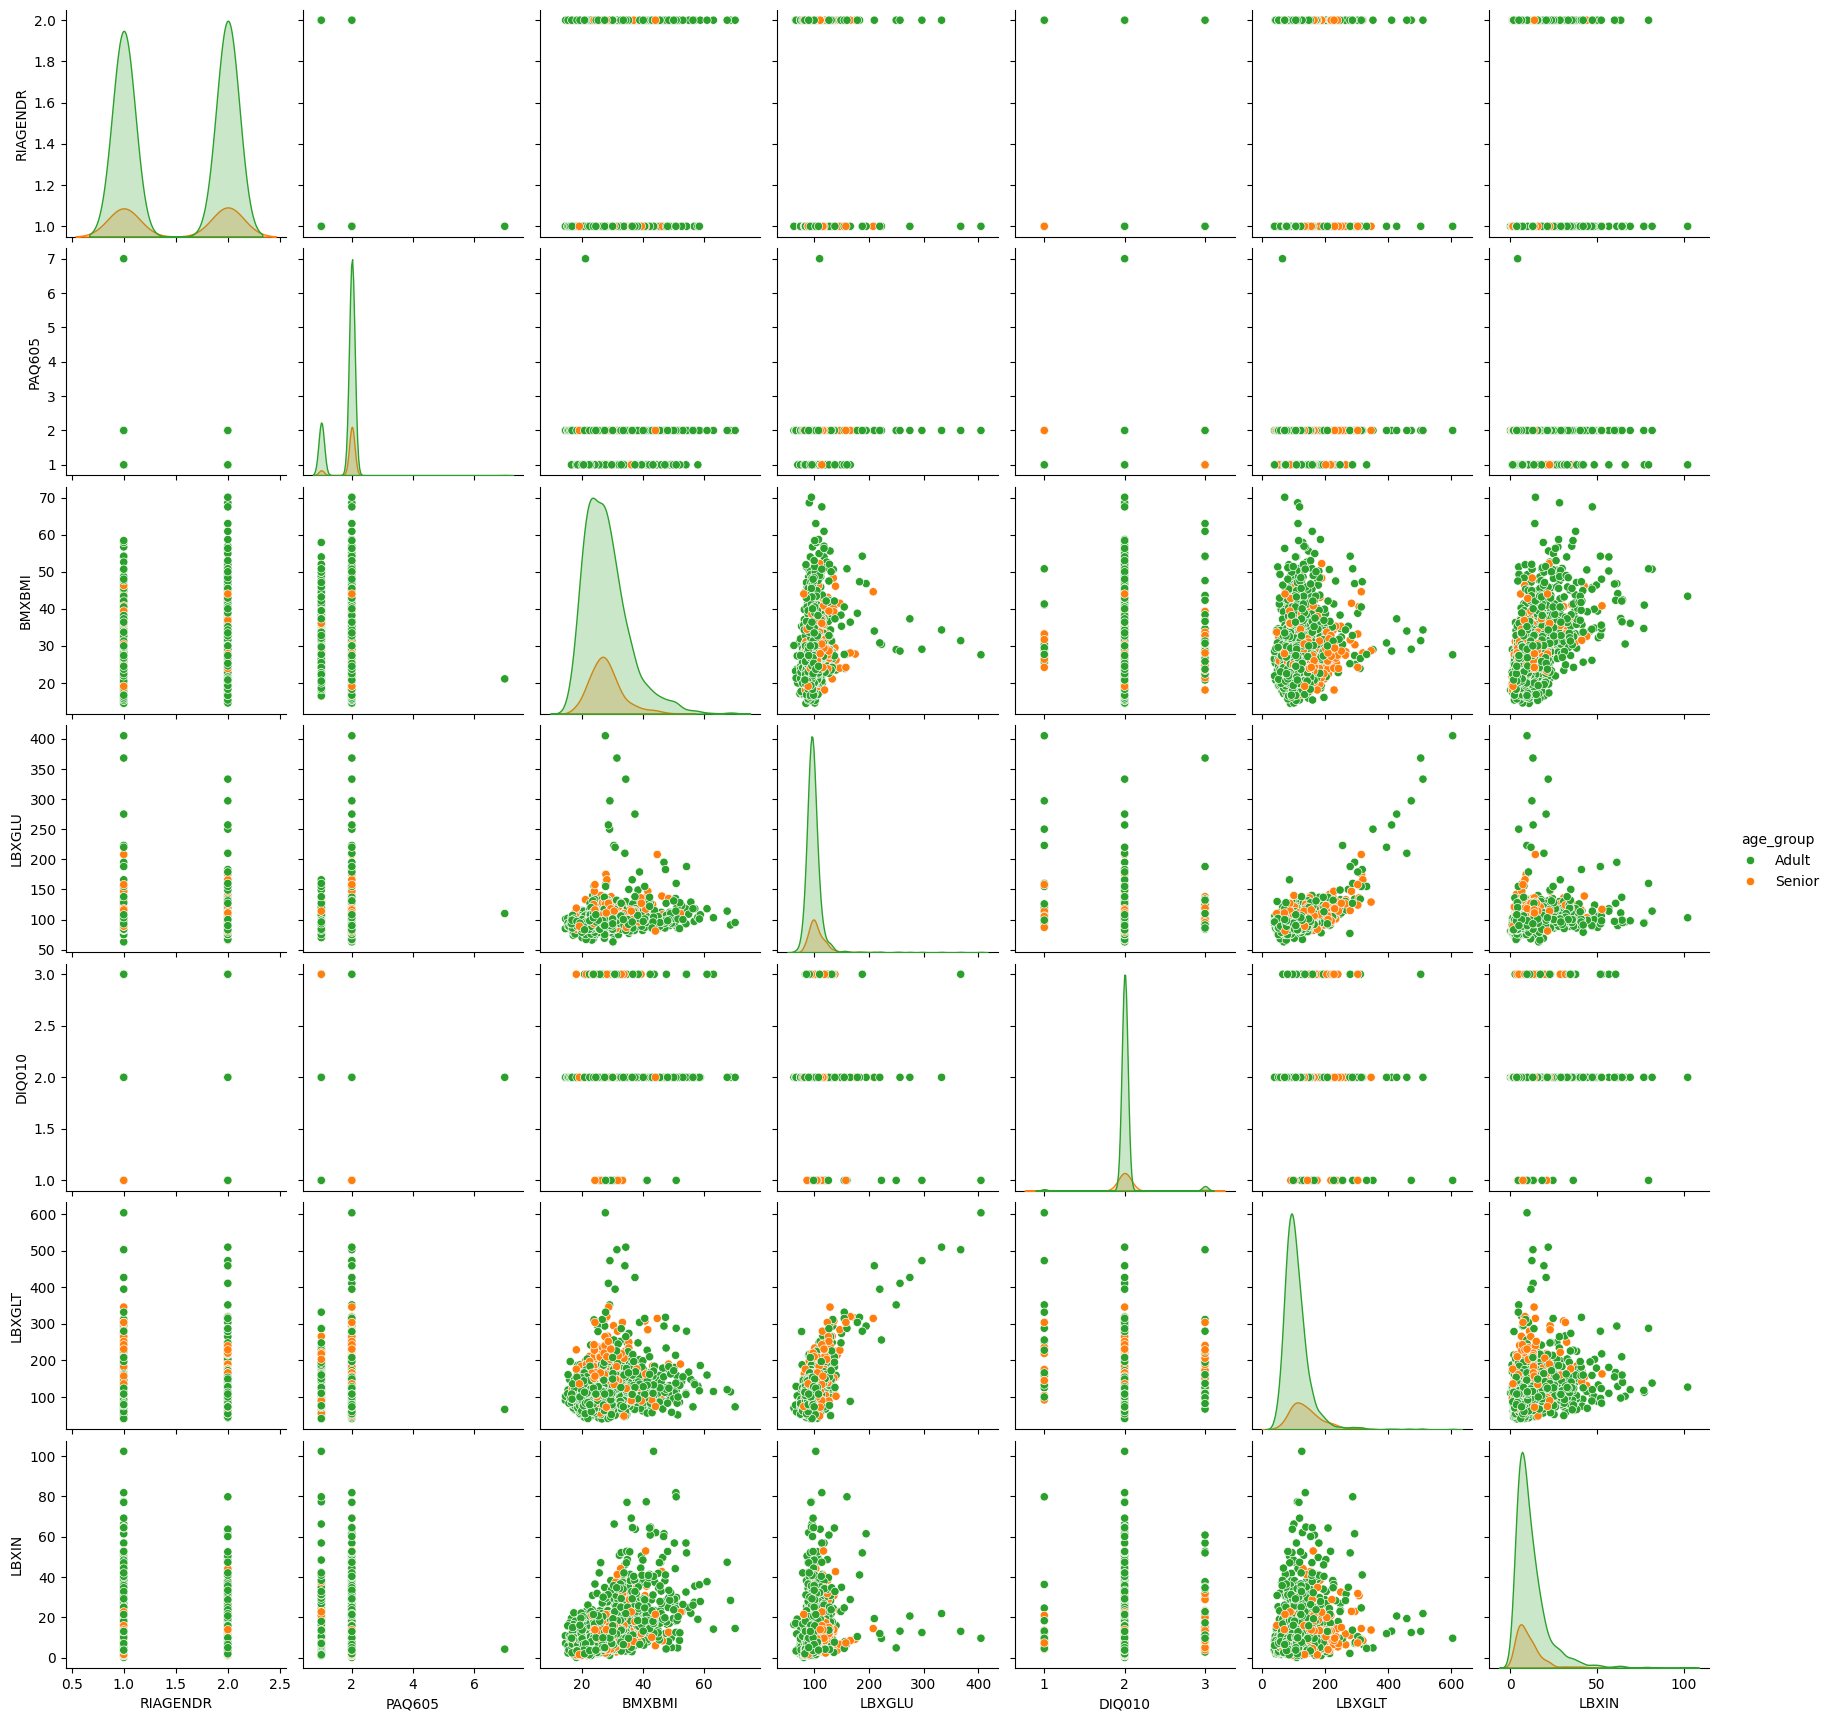

<Figure size 1000x600 with 0 Axes>

In [9]:
# Visualisasi Pairplot Antar Fitur
sns.pairplot(df, hue='age_group', palette=['#2ca02c', '#ff7f0e'])
plt.figure(figsize=(10, 6))
plt.show()

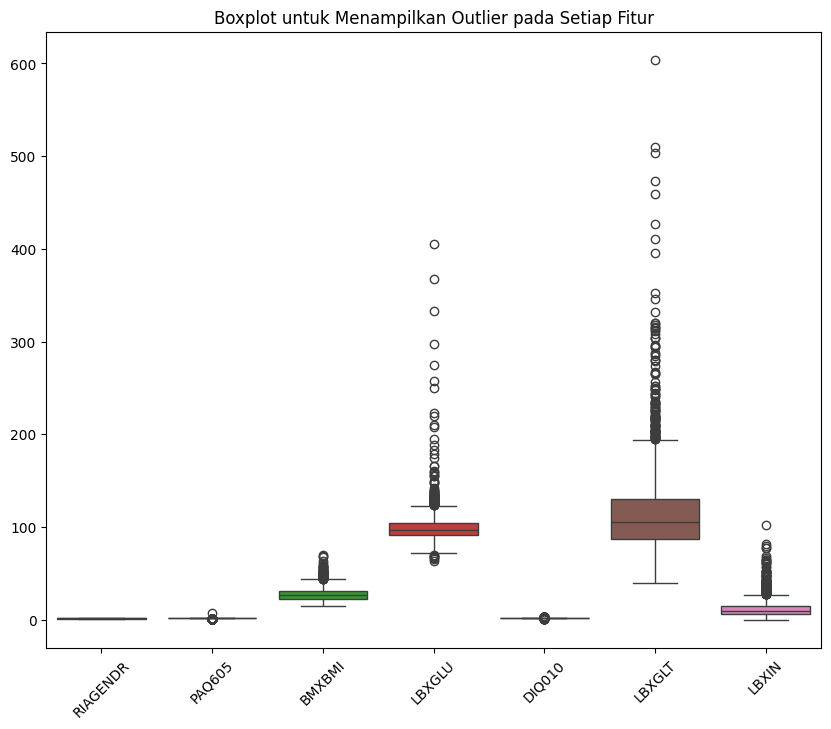

In [10]:
# Visualisasi Boxplot antar fitur
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_fitur)
plt.title('Boxplot untuk Menampilkan Outlier pada Setiap Fitur')
plt.xticks(rotation=45)
plt.show()

## **C. Data Preprocessing**

#### Data Cleaning

In [11]:
# Cek Missing Value
print("Missing Value data fitur")
print(df_fitur.isnull().sum())
print("\nMissing Value data target")
print(df_target.isnull().sum())

Missing Value data fitur
RIAGENDR    0
PAQ605      0
BMXBMI      0
LBXGLU      0
DIQ010      0
LBXGLT      0
LBXIN       0
dtype: int64

Missing Value data target
age_group    0
dtype: int64


In [ ]:
# IQR
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outliers dengan batas atas/bawah yang sesuai
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    return data

# Membuat salinan dari dataset untuk hasil yang lebih tepat
new_df = df.copy()

# Menghapus outliers dari setiap kolom numerik
for col in new_df.select_dtypes(include=['int', 'float']).columns:
    new_df = handle_outliers(new_df, col)

In [ ]:
# HAMPEL
must_be_transform = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'DIQ010', 'LBXGLT', 'LBXIN', 'LBXGLU']
new_df = df.copy()
def hampel_filter(df, column, window_size=7, n_sigmas=3):
    series = df[column]
    rolling_median = series.rolling(window=window_size, center=True).median()
    mad = lambda x: np.median(np.abs(x - np.median(x)))
    rolling_mad = series.rolling(window=window_size, center=True).apply(mad)
    threshold = n_sigmas * rolling_mad
    difference = np.abs(series - rolling_median)
    outliers = difference > threshold
    return df[~outliers]

# Menerapkan metode Hampel Filter pada setiap kolom dalam daftar fitur
for category in must_be_transform:
    new_df = hampel_filter(new_df, category)


In [43]:
# Z-SCORE
# Menghapus Outlier
must_be_transform = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'DIQ010', 'LBXGLT', 'LBXIN', 'LBXGLU']
new_df = df.copy()
for category in must_be_transform:
  upper_limit = new_df[category].mean() + 3*new_df[category].std()
  lower_limit = new_df[category].mean() - 3*new_df[category].std()

  print(f"{category} -> Upper: {upper_limit} Lower: {lower_limit}")

  test = new_df.loc[(new_df[category] < upper_limit) & (new_df[category] > lower_limit)]
  print(f"Old: {len(new_df)}")
  print(f"New: {len(test)}")

  new_df = new_df.loc[(new_df[category] < upper_limit) & (new_df[category] > lower_limit)]

RIAGENDR -> Upper: 3.0113519231401953 Lower: 0.01147511812407176
Old: 2278
New: 2278
PAQ605 -> Upper: 3.019404607614998 Lower: 0.6258982896633163
Old: 2278
New: 2277
BMXBMI -> Upper: 49.70557876179353 Lower: 6.2108024415441925
Old: 2277
New: 2239
DIQ010 -> Upper: 2.5587944474599227 Lower: 1.471576253745973
Old: 2239
New: 2165
LBXGLT -> Upper: 240.15699571433544 Lower: -15.343138901402384
Old: 2165
New: 2129
LBXIN -> Upper: 38.542433522353335 Lower: -15.914157336350515
Old: 2129
New: 2086
LBXGLU -> Upper: 127.66974493065851 Lower: 67.13658296962913
Old: 2086
New: 2057


In [13]:
print("Original DataFrame:\n", df)
print("Cleaned DataFrame:\n", new_df)

Original DataFrame:
       RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15     Adult
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult
...        ...     ...     ...     ...     ...     ...    ...       ...
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53     Adult
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02     Adult
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41     Adult
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99     Adult
2277       1.0     2.0    24.5   108.0     2.0   108.0   3.76     Adult

[2278 rows x 8 columns]
Cleaned DataFrame:
       RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_grou

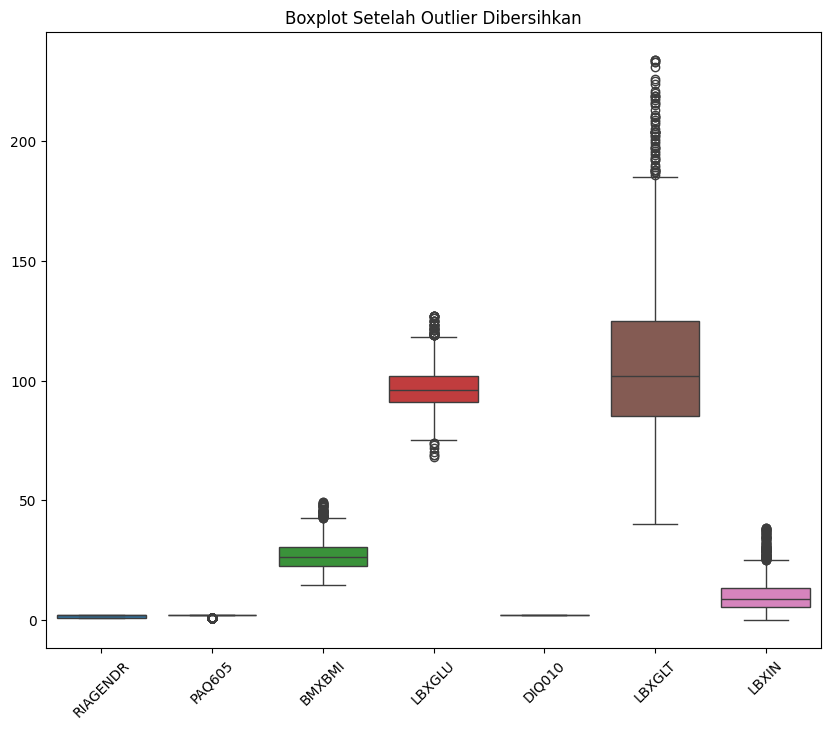

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=new_df)
plt.title('Boxplot Setelah Outlier Dibersihkan')
plt.xticks(rotation=45)
plt.show()

#### Data Transformation

In [44]:
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values

In [45]:
print(new_df)

      RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15     Adult
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult
...        ...     ...     ...     ...     ...     ...    ...       ...
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53     Adult
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02     Adult
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41     Adult
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99     Adult
2277       1.0     2.0    24.5   108.0     2.0   108.0   3.76     Adult

[2057 rows x 8 columns]


#### Splitting Data

In [46]:
# Bagi menjadi data uji dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
print(X_train)

[[  1.     2.    30.9  ...   2.   117.    11.29]
 [  1.     2.    17.6  ...   2.   148.     3.09]
 [  1.     1.    27.2  ...   2.    76.     6.5 ]
 ...
 [  2.     2.    26.3  ...   2.   123.     3.63]
 [  1.     2.    21.1  ...   2.   129.     8.13]
 [  1.     2.    29.9  ...   2.   139.    11.96]]


In [23]:
print(X_test)

[[  2.     2.    32.6  ...   2.   116.    17.93]
 [  1.     2.    39.4  ...   2.    89.    11.9 ]
 [  1.     2.    25.6  ...   2.   163.    19.  ]
 ...
 [  1.     2.    26.5  ...   2.   137.     9.19]
 [  2.     2.    26.7  ...   2.   221.    13.44]
 [  1.     2.    31.3  ...   2.   101.    26.73]]


#### Normalisasi

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
print(X_train)

[[-1.02899151  0.46456076  0.61335967 ...  0.          0.27060955
   0.13048076]
 [-1.02899151  0.46456076 -1.53925333 ...  0.          1.21573206
  -1.07995272]
 [-1.02899151 -2.15257094  0.01451244 ...  0.         -0.9793912
  -0.57658953]
 ...
 [ 0.97182532  0.46456076 -0.1311531  ...  0.          0.45353648
  -1.00024124]
 [-1.02899151  0.46456076 -0.97277623 ...  0.          0.63646342
  -0.33597897]
 [-1.02899151  0.46456076  0.45150906 ...  0.          0.94134165
   0.22938203]]


In [53]:
print(X_test)

[[ 0.97182532  0.46456076  0.88850569 ...  0.          0.24012172
   1.11063665]
 [-1.02899151  0.46456076  1.98908978 ...  0.         -0.5830495
   0.2205252 ]
 [-1.02899151  0.46456076 -0.24444852 ...  0.          1.6730494
   1.26858346]
 ...
 [-1.02899151  0.46456076 -0.09878298 ...  0.          0.880366
  -0.1795083 ]
 [ 0.97182532  0.46456076 -0.06641286 ...  0.          3.44134313
   0.44785052]
 [-1.02899151  0.46456076  0.67809991 ...  0.         -0.21719562
   2.40963844]]


## **D. Metode Yang Digunakan**

Metode machine learning yang kami gunakan adalah metode **K-Nearest Neighbor**. Metode ini cocok untuk digunakan pada dataset NHANES Age Prediction karena kesederhanaan dan fleksibilitasnya. KNN tidak membuat asumsi distribusi data yang kuat, yang sangat penting untuk dataset kompleks dan bervariasi seperti dataset ini.

Dibandingkan dengan metode lain seperti Decision Tree dan Naive Bayes, KNN memiliki beberapa keunggulan. KNN lebih tahan terhadap overfitting karena dapat dikendalikan melalui pemilihan jumlah tetangga (k) dan tidak sensitif terhadap perubahan kecil dalam data. Selain itu, KNN tidak memerlukan asumsi independensi antar fitur seperti yang dilakukan oleh Naive Bayes, sehingga dapat menangani korelasi antar fitur dengan lebih baik. Secara keseluruhan, KNN menawarkan pendekatan yang sederhana namun efektif untuk prediksi usia dalam dataset NHANES Age Prediction ini.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [55]:
# Inisialisasi variabel untuk melacak akurasi terbaik dan nilai k terbaik
best_k = 1
best_test = 0
best_classification_report = ""

n_neighbors_range = range(1, 11)

# Iterasi melalui nilai-nilai n_neighbors
for k in n_neighbors_range:
    # Inisialisasi model KNN dengan n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

    # Melatih model
    knn.fit(X_train, y_train)

    # Menghitung akurasi pada data test dan data training
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    training_accuracy = accuracy_score(y_train, knn.predict(X_train))

    # Memperbarui nilai k terbaik jika akurasi test saat ini lebih baik
    # atau jika akurasi test sama tapi akurasi training lebih kecil
    if (test_accuracy > best_test) or (test_accuracy == best_test and training_accuracy < best_training):
        best_k = k
        best_test = test_accuracy
        best_training = training_accuracy
        best_classification_report = classification_report(y_test, knn.predict(X_test))

    # Mencetak laporan klasifikasi dan akurasi
    print(f"Results for n_neighbors = {k}:")
    print(f"Training Accuracy: {training_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    print("---------------------------------------------------------------------\n")

# Mencetak hasil terbaik
print(f"Best Test Accuracy ada di n_neighbors = {best_k}")
print(f"Training Accuracy: {best_training:.3f}")
print(f"Test Accuracy: {best_test:.3f}")
print("Best Classification Report:")
print(best_classification_report)

Results for n_neighbors = 1:
Training Accuracy: 1.000
Test Accuracy: 0.789
---------------------------------------------------------------------

Results for n_neighbors = 2:
Training Accuracy: 0.892
Test Accuracy: 0.828
---------------------------------------------------------------------

Results for n_neighbors = 3:
Training Accuracy: 0.894
Test Accuracy: 0.823
---------------------------------------------------------------------

Results for n_neighbors = 4:
Training Accuracy: 0.878
Test Accuracy: 0.837
---------------------------------------------------------------------

Results for n_neighbors = 5:
Training Accuracy: 0.876
Test Accuracy: 0.833
---------------------------------------------------------------------

Results for n_neighbors = 6:
Training Accuracy: 0.872
Test Accuracy: 0.852
---------------------------------------------------------------------

Results for n_neighbors = 7:
Training Accuracy: 0.872
Test Accuracy: 0.840
-------------------------------------------------

Setelah mencoba-coba beberapa parameter, kami memutuskan untuk menggunakan metrik jarak **Manhattan** untuk mengukur kedekatan antara data poin dalam ruang fitur. Kami juga mencari nilai k terbaik mulai dari 1-10.

Dari hasil yang ditemukan, ternyata k terbaik adalah k dengan nilai 8.
Dengan training accuracy sebesar 0.864 dan test accuracy sebesar 0.852

## **E. Hasil dan Analisis**

In [ ]:
from google.colab import files
file = files.upload()

Saving Hampel.jpg to Hampel.jpg
Saving IQR.jpg to IQR.jpg
Saving Z-Score.jpg to Z-Score.jpg


Hasil Test Accuracy dengan IQR


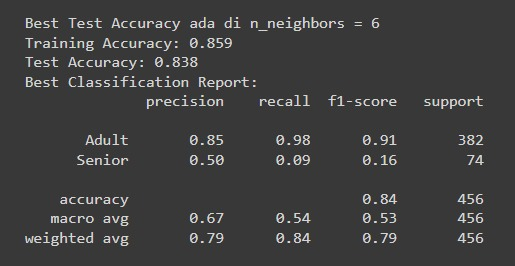


Hasil Test Accuracy dengan Hampel


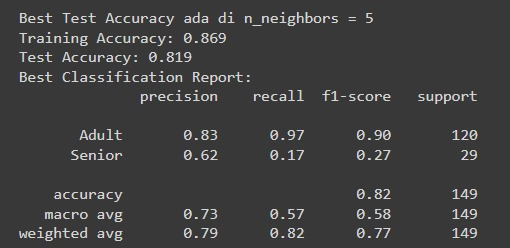


Hasil Test Accuracy dengan Z-Score


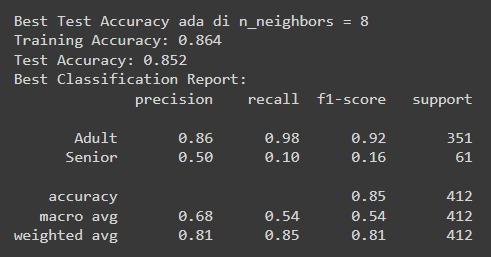

In [ ]:
from IPython.display import display, Image

print('Hasil Test Accuracy dengan IQR')
display(Image(filename='IQR.jpg', height = 210))

print('\nHasil Test Accuracy dengan Hampel')
display(Image(filename='Hampel.jpg', height = 210))

print('\nHasil Test Accuracy dengan Z-Score')
display(Image(filename='Z-Score.jpg', height = 210))

In [56]:
# Metrik yang akan digunakan
metrics = ['manhattan', 'euclidean', 'minkowski']

# Menyimpan hasil akurasi
results = []

for metric in metrics:
    for k in range(1, 11):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((metric, k, accuracy))

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results, columns=['Metric', 'n_neighbors', 'Accuracy'])

# Menampilkan hasil
print(results_df)

# Menampilkan hasil terbaik setiap metrik
best_results = results_df.loc[results_df.groupby('Metric')['Accuracy'].idxmax()]
best_results['Accuracy'] = best_results['Accuracy'].round(3)
print("\nHasil terbaik untuk setiap metric:")
print(best_results)

# Menampilkan metrik terbaik dari ketiga metrik
best_overall = best_results.loc[best_results['Accuracy'].idxmax()]
print("\nHasil terbaik keseluruhan:")
print(best_overall)


       Metric  n_neighbors  Accuracy
0   manhattan            1  0.788835
1   manhattan            2  0.827670
2   manhattan            3  0.822816
3   manhattan            4  0.837379
4   manhattan            5  0.832524
5   manhattan            6  0.851942
6   manhattan            7  0.839806
7   manhattan            8  0.851942
8   manhattan            9  0.839806
9   manhattan           10  0.851942
10  euclidean            1  0.776699
11  euclidean            2  0.830097
12  euclidean            3  0.820388
13  euclidean            4  0.844660
14  euclidean            5  0.825243
15  euclidean            6  0.837379
16  euclidean            7  0.830097
17  euclidean            8  0.844660
18  euclidean            9  0.837379
19  euclidean           10  0.844660
20  minkowski            1  0.776699
21  minkowski            2  0.830097
22  minkowski            3  0.820388
23  minkowski            4  0.844660
24  minkowski            5  0.825243
25  minkowski            6  0.837379
2

Dataset yang kami gunakan adalah (NHANES) Age Prediction. Pada dataset ini terdapat 7 fitur yaitu RIAGENDR (Jenis Kelamin), PAQ605 (Intensitas Kegiatan), BMXBMI (Indeks Massa Tubuh), LBXGLU (Glukosa Darah setelah Puasa), DIQ010 (Riwayat Diabetes), LBXGLT (Toleransi Glukosa), dan LBXIN (Kadar Insulin Darah). Selain itu, dataset ini juga memiliki satu target, yaitu age_group (Kelompok Usia (senior/adult)).

Berdasarkan visualisasi boxplot yang telah dibuat, ternyata terdapat banyak outlier pada sebagian besar fitur. Lalu kami mencoba untuk melakukan penanganan terhadap outlier dengan menggunakan tiga metode yaitu metode IQR, Hampel, dan Z-Score. Ketiga metode penghapusan outlier ini tentunya memiliki hasil yang berbeda. Kami mencoba mencari metode terbaik dari ketiganya. Didapatkan akurasi awal sebelum dihapus outliernya sebesar 0.855.

Berikut adalah beberapa percobaan metode penghapusan outlier yang dicoba dengan jangkauan k dari 1-10 :
*   Metode IQR, semua outlier terhapus dan mendapatkan hasil training accuracy sebesar 0.852 serta test accuracy sebesar 0.838, dengan nilai k = 10.
*   Metode Hampel, outlier berkurang sehingga hanya tersisa beberapa dan value paling jauh berada di 200-300 saja, dan mendapatkan hasil training accuracy sebesar 0.855 serta test accuracy sebesar 0.812, dengan nilai k = 6.
*   Metode Z-Score, outlier sedikit berkurang, dan mendapatkan hasil training accuracy sebesar 0.864 serta test accuracy mencapai 0.852, dengan nilai k = 8.

Setelah diamati, menurut kami metode penanganan outlier yang cocok adalah dengan menggunakan metode Z-Score. Metode ini cocok karena dataset ini umumnya memiliki distribusi data yang relatif simetris atau mendekati distribusi normal, dan ukuran sampel yang besar memungkinkan penggunaan Z-Score untuk memberikan estimasi yang stabil terhadap rata-rata dan standar deviasi.

Selanjutnya kami juga mencoba beberapa metrik jarak, seperti manhattan, euclidean, dan minkowski. Ketiganya kami coba dengan rentang nilai k mulai dari 1-10. Dari percobaan ketiga metrik jarak itu didapatkan hasil bahwa metrik jarak manhattan memiliki nilai akurasi yang paling tinggi di antara metrik jarak lainnya. Oleh karena itu, kami memutuskan untuk menggunakan metrik jarak manhattan.


## **F. Kesimpulan**

Dataset yang kami gunakan adalah (NHANES) Age Prediction Subset. Pada dataset ini terdapat 7 fitur yaitu RIAGENDR (Jenis Kelamin), PAQ605 (Intensitas Kegiatan), BMXBMI (Indeks Massa Tubuh), LBXGLU (Glukosa Darah setelah Puasa), DIQ010 (Riwayat Diabetes), LBXGLT (Toleransi Glukosa), dan LBXIN (Kadar Insulin Darah). Selain itu, dataset ini juga memiliki satu target, yaitu age_group (Kelompok Usia (senior/adult)). Kegunaan dari dataset ini adalah untuk mengeksplorasi dan memahami faktor-faktor yang berpengaruh terhadap usia dan mengelompokkannya menjadi dua kelompok usia (senior dan adult).

Untuk penanganan outlier menggunakan metode Z-Score. Metode ini cocok karena dataset ini umumnya memiliki distribusi data yang relatif simetris atau mendekati distribusi normal, dan ukuran sampel yang besar memungkinkan penggunaan Z-Score untuk memberikan estimasi yang stabil terhadap rata-rata dan standar deviasi.

Metode K-Nearest Neighbor dipilih untuk dataset NHANES Age Prediction karena kesederhanaan dan fleksibilitasnya, serta keandalannya terhadap overfitting dan kemampuannya menangani korelasi antar fitur tanpa asumsi distribusi data yang kuat. Dibandingkan dengan Decision Tree dan Naive Bayes, KNN lebih mudah dikendalikan melalui jumlah tetangga dan tidak memerlukan asumsi independensi antar fitur, menjadikannya pilihan yang efektif untuk prediksi usia dalam dataset ini.

Setelah mencoba beberapa metrik jarak untuk KNN, digunakan metrik jarak Manhattan. Metrik jarak manhattan ini dipilih karena memiliki test accuracy yang paling tinggi di antara kedua metric jarak lainnya.

Pada akhirnya didapatkan hasil **training accuracy sebesar 0.864** dan **test accuracy sebesar 0.852**. Dapat disimpulkan bahwa model memiliki kinerja yang baik. Training Accuracy yang tinggi menunjukkan bahwa model mampu mempelajari pola dari data training dengan baik, sementara Test Accuracy yang mendekati Training Accuracy menunjukkan bahwa model juga dapat menggeneralisasi pola tersebut dengan baik pada data baru yang belum ada di dataset. Dengan demikian, hasil ini menunjukkan bahwa model K-Nearest Neighbor yang digunakan relatif baik dalam melakukan prediksi usia dalam dataset NHANES Age Prediction ini.